In [1]:
# Import dependencies
import pandas as pd
import sqlite3
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:

# Connect to the SQLite database
conn = sqlite3.connect("fetal_health_CTG_data.db")

# Query to select all data from the table
query = "SELECT * FROM fetal_health_CTG_data"

# Read data from the database into a DataFrame
fetal_df= pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [3]:
# Display the DataFrame
fetal_df.head()

,baseline_FHR_bpm,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnorm_ST_Var_Perc,mean_ST_Var,abnorm_LT_Var_Perc,...,FHR_hist_min,FHR_hist_max,FHR_hist_num_peaks,FHR_hist_num_zeroes,FHR_hist_mode,FHR_hist_mean,FHR_hist_median,FHR_hist_variance,FHR_hist_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1


In [4]:
#check the value counts of fetal health
health_status_ct=fetal_df["fetal_health"].value_counts()
health_status_ct

fetal_health
1    1655
2     295
3     176
Name: count, dtype: int64

In [5]:
fetal_df.corr()

,baseline_FHR_bpm,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnorm_ST_Var_Perc,mean_ST_Var,abnorm_LT_Var_Perc,...,FHR_hist_min,FHR_hist_max,FHR_hist_num_peaks,FHR_hist_num_zeroes,FHR_hist_mode,FHR_hist_mean,FHR_hist_median,FHR_hist_variance,FHR_hist_tendency,fetal_health
baseline_FHR_bpm,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolonged_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnorm_ST_Var_Perc,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_ST_Var,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
abnorm_LT_Var_Perc,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [7]:
# Calculate the correlation matrix
correlation_matrix = fetal_df.corr()

# Extract the correlation coefficients of features with the target variable
correlation_with_target = correlation_matrix["fetal_health"].sort_values(ascending=False)

# Print the correlation coefficients
print(correlation_with_target)

fetal_health               1.000000
prolonged_decelerations    0.484859
abnorm_ST_Var_Perc         0.471191
abnorm_LT_Var_Perc         0.426146
FHR_hist_variance          0.206630
baseline_FHR_bpm           0.148151
severe_decelerations       0.131934
fetal_movement             0.088010
FHR_hist_min               0.063175
light_decelerations        0.058870
FHR_hist_num_zeroes       -0.016682
FHR_hist_num_peaks        -0.023666
FHR_hist_max              -0.045265
FHR_hist_width            -0.068789
mean_ST_Var               -0.103382
FHR_hist_tendency         -0.131976
uterine_contractions      -0.204894
FHR_hist_median           -0.205033
mean_LT_Var               -0.226797
FHR_hist_mean             -0.226985
FHR_hist_mode             -0.250412
accelerations             -0.364066
Name: fetal_health, dtype: float64


The feature showing the relatively strong correlation with fetal health is prolonged decelerations. There are moderate correlations also observed between fetal health and abnormal short term variability, as well as fetal health and percentage of time with abnormal long term variability.

correlation coefficient : 0.48
The r squared value is :0.24


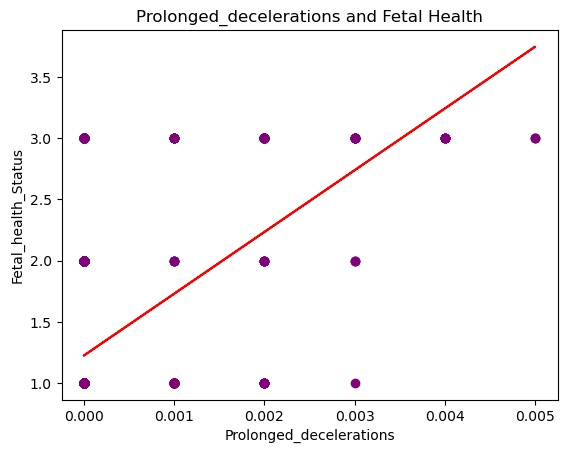

In [31]:
#Scatter plot
from scipy.stats import linregress

x_values = fetal_df ["prolonged_decelerations"]
y_values=fetal_df["fetal_health"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2.2),fontsize=15,color="red")
plt.xlabel("Prolonged_decelerations")
plt.ylabel("Fetal_health_Status")
plt.title("Prolonged_decelerations and Fetal Health")
print(f"correlation coefficient : {round(rvalue,2)}")
print(f"The r squared value is :{round(rvalue**2,2)}")

plt.show()

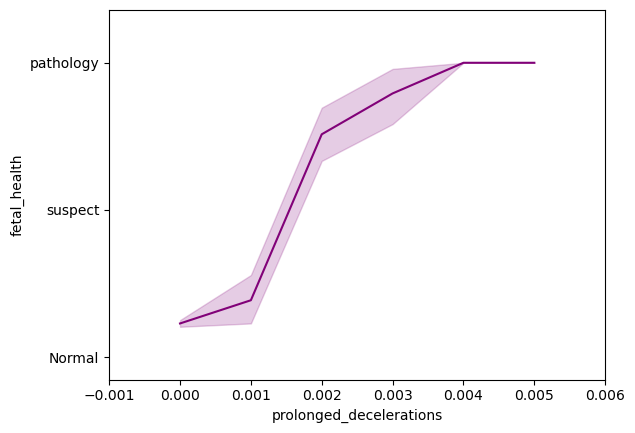

In [42]:
sns.set_palette(palette='RdPu_r')
sns.lineplot(x="prolonged_decelerations",y="fetal_health", data=fetal_df, alpha=1.0)
y = [1,2,3]
labels = ["Normal", "suspect","pathology"]
plt.yticks(y, labels)
plt.margins(0.2)


This lineplot clearly shows the relationship between prolonged decelerations of fetal heart rate and fetal health outcome. The longer amount of time observed with prolonged decelerations, the more at-risk the health outcome was likely to be.